# Summary
In this notebook we'll look at the relations between suicide rates and other statistics about countries, such as happiness levels, economic factors, etc.. 

Rural population data: https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS?view=chart
GDP per capita PPP data: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD
GDP data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?name_desc=false


In [107]:
CHOROPLETH_DATA_FILE = '../data/processed/choropleth_df.csv'
GDP_PER_CAPITA = '../data/raw/API_NY.GDP.PCAP.PP.KD_DS2_en_csv_v2_443996/API_NY.GDP.PCAP.PP.KD_DS2_en_csv_v2_443996.csv'

In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [109]:
df = pd.read_csv(GDP_PER_CAPITA, skiprows=4)

In [110]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,35492.618487,34830.976551,36082.522486,36172.933355,35814.261438,35557.656862,35861.828118,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214,NaN,NaN
2,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238,NaN,NaN
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,10207.751719,10369.560557,10492.668465,10700.520916,10971.044395,11356.717007,11803.281802,12306.260040,NaN,NaN
4,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# remove columns we don't need, rename columns we do want
gdp = df.loc[:, ~df.columns.str.contains('^Unnamed')]
gdp = gdp.rename(columns={"Country Code": "code"}).drop(columns=["Indicator Name", "Indicator Code", "Country Name"])

# pivot
gdp = pd.melt(gdp, id_vars=['code'], var_name='year', value_name='gdp')

# only pick years we want
gdp["year"] = gdp["year"].astype(float)
gdp = gdp[(gdp["year"] < 2015) & (gdp["year"] > 1989)]

num_years = gdp["year"].nunique()
num_countries = gdp["code"].nunique()

assert len(gdp) == num_years * num_countries, "Need every unique (country, year) combination"

# get all codes which have nan values but at least two non-nan values (otherwise can't fill in others really)
null_codes = gdp[gdp["gdp"].isnull()]["code"].value_counts()
null_codes = list(null_codes[null_codes < num_years - 1].index)

# replace nans with nearest neighbours means. TODO: finish this (even though it doesn't replace anything). 
# maybe forward fill or backward fill just single years?
for code in null_codes:
    data = gdp[gdp["code"] == code].sort_values(by="year")
    data["gdp"] = (data["gdp"].fillna(method='ffill') + data["gdp"].fillna(method='bfill'))/2


In [142]:
sub.head()

,code,year,gdp
7920,ABW,1990.0,37140.024657
7921,AFG,1990.0,NaN
7922,AGO,1990.0,4761.229638
7923,ALB,1990.0,4458.246876
7924,AND,1990.0,NaN


In [115]:
# get list of countries that have nans in gdp (and that have at least 2 non-nan values)
# for these countries, remove blocks of nans at the start and end, now remove all countries again which have no data left
# fill up missing values with means of the first next year and the first previous year

In [186]:
for ii, code in enumerate(null_codes):
    data = sub[sub["code"] == code].sort_values(by="year")

    
    #data["gdp"] = 
    bla = (data["gdp"].fillna(method='ffill') + data["gdp"].fillna(method='bfill'))/2
    
    num_nans_1 = data["gdp"].isnull().sum()
    if num_nans_1 > sum(bla.isnull()):
        break
    elif num_nans_1 == sum(bla.isnull()):
        print(ii)
    
    # get first non-nan value

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [181]:
bla

8049             NaN
8313             NaN
8577             NaN
8841             NaN
9105             NaN
9369             NaN
9633             NaN
9897             NaN
10161            NaN
10425            NaN
10689    1317.871303
10953    1307.927549
11217    1325.377434
11481     910.095637
11745     916.487110
12009     940.163231
12273     981.892433
12537    1034.292458
12801    1063.369701
13065    1076.105620
13329    1101.484191
13593    1154.409370
13857    1211.054620
14121    1281.549652
14385    1257.625441
Name: gdp, dtype: float64

In [182]:
data

,code,year,gdp
8049,LBR,1990.0,NaN
8313,LBR,1991.0,NaN
8577,LBR,1992.0,NaN
8841,LBR,1993.0,NaN
9105,LBR,1994.0,NaN
9369,LBR,1995.0,NaN
9633,LBR,1996.0,NaN
9897,LBR,1997.0,NaN
10161,LBR,1998.0,NaN
10425,LBR,1999.0,NaN


In [150]:
data

,code,year,gdp
8146,TCA,1990.0,NaN
8410,TCA,1991.0,NaN
8674,TCA,1992.0,NaN
8938,TCA,1993.0,NaN
9202,TCA,1994.0,NaN
9466,TCA,1995.0,NaN
9730,TCA,1996.0,NaN
9994,TCA,1997.0,NaN
10258,TCA,1998.0,NaN
10522,TCA,1999.0,NaN


In [148]:
sub.fillna(method='ffill') + sub.fillna(method='bfill')/2

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [87]:
gdp_cleaned = pd.merge(gdp[["country", "code"]], sub, on="code")

In [97]:
test = gdp_cleaned.sort_values(by='gdp', ascending=False)
test["year"] = test["year"].astype(float)
test = test.loc[(test["year"] > 1989) & (test["year"] < 2015)]

In [98]:
test.drop_duplicates(subset=['code'], keep='first').head(20)

,country,code,year,gdp
8693,"Macao SAR, China",MAC,2013.0,134960.067209
11931,Qatar,QAT,2011.0,124024.568165
390,United Arab Emirates,ARE,1990.0,112349.597967
8567,Luxembourg,LUX,2007.0,97864.195101
7547,Kuwait,KWT,2007.0,96846.868057
12648,San Marino,SMR,2008.0,90839.507963
1772,Brunei Darussalam,BRN,1992.0,86445.686749
3038,Cayman Islands,CYM,1998.0,82533.674883
12414,Singapore,SGP,2014.0,81965.361071
10547,Norway,NOR,2007.0,65083.258698


In [99]:
# plot over time, see if more or less continuous trend
# fill in missing values by taking means or whatever

In [100]:
test.isnull().sum()

country      0
code         0
year         0
gdp        817
dtype: int64

In [101]:
len(test)

6600

In [93]:
def plot_for_country(data_frame, country):
    fig = plt.figure(figsize=(25,5))
    sample = data_frame.loc[data_frame["country"] == country]
    sns.lineplot(x="year", y="gdp", data=sample)

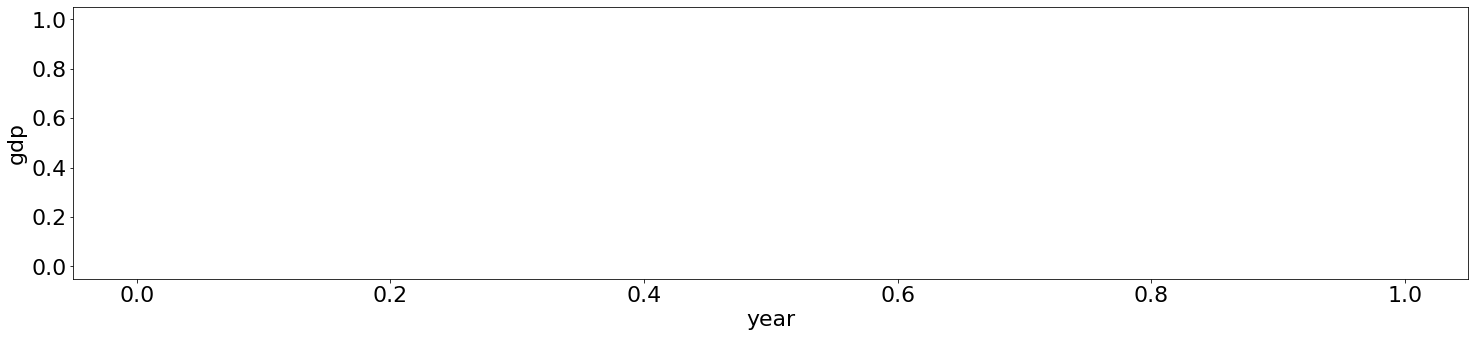

In [106]:
plot_for_country(test, "Andorra")

In [120]:
test[test["gdp"].isnull()]["country"].value_counts(normalize=True)

Cuba                         0.030600
Somalia                      0.030600
Syrian Arab Republic         0.030600
Monaco                       0.030600
Liechtenstein                0.030600
New Caledonia                0.030600
Virgin Islands (U.S.)        0.030600
Channel Islands              0.030600
Not classified               0.030600
American Samoa               0.030600
Guam                         0.030600
Greenland                    0.030600
Andorra                      0.030600
British Virgin Islands       0.030600
Isle of Man                  0.030600
St. Martin (French part)     0.030600
Gibraltar                    0.030600
Korea, Dem. People’s Rep.    0.030600
Faroe Islands                0.030600
French Polynesia             0.030600
Northern Mariana Islands     0.030600
Djibouti                     0.029376
Turks and Caicos Islands     0.025704
Sint Maarten (Dutch part)    0.023256
South Sudan                  0.022032
Nauru                        0.020808
Afghanistan 

In [63]:
max(test["year"])

'2019'

In [96]:
test[test["country"] == "France"]

,country,code,year,gdp
4558,France,FRA,2018.0,39555.544663
4557,France,FRA,2017.0,38955.833966
4556,France,FRA,2016.0,38097.877038
4555,France,FRA,2015.0,37835.807077
4547,France,FRA,2007.0,37670.527838
4554,France,FRA,2014.0,37575.811818
4548,France,FRA,2008.0,37556.095877
4551,France,FRA,2011.0,37440.638630
4553,France,FRA,2013.0,37398.926120
4552,France,FRA,2012.0,37376.535433
